# 3. Landing
Отдел маркетинга разработал новый дизайн посадочной страницы клиента (landing). Пользователи сайта оценили новый дизайн. Результаты итоговой оценки зафиксированы в количественной переменной `Общая оценка`. Средняя оценка старого дизайна по результатам прошлого исследования составляет 30 баллов.
Значимо ли улучшился дизайн посадочной страницы сайта, и есть ли влияние возраста на оценку нового дизайна?
Необходимо ответить на вопрос, используя статистические методы, а также дать рекомендации отделу маркетинга по результатам проведенного анализа.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data/landing_data.xlsx')

In [3]:
df.head(3)

,Возрастная группа,Общая оценка
0,65 и страше,38.454803
1,55-64,17.669677
2,65 и страше,31.704307


In [4]:
df.columns = ['age_group', 'mark']

In [5]:
df.head(3)

,age_group,mark
0,65 и страше,38.454803
1,55-64,17.669677
2,65 и страше,31.704307


In [6]:
df.age_group = df.age_group.str.replace('65 и страше', '65+') 

In [7]:
df.age_group.value_counts()

age_group
65+      17
До 25    13
35-44    12
25-34    10
45-54    10
55-64     6
Name: count, dtype: int64

In [8]:
df.shape[0]

68

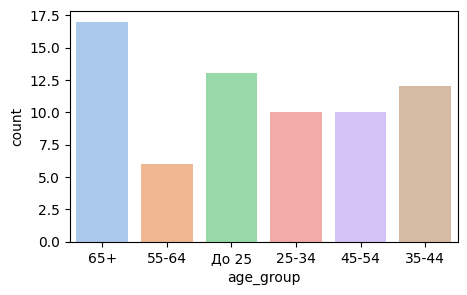

In [9]:
plt.figure(figsize=(5, 3))
sns.countplot(x='age_group', hue='age_group', data=df, palette='pastel')
plt.show()

In [10]:
df.mark.describe()

count    68.000000
mean     31.950764
std       7.319992
min      15.734473
25%      26.391984
50%      30.737297
75%      37.493531
max      47.501470
Name: mark, dtype: float64

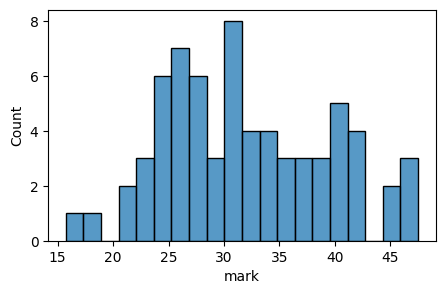

In [11]:
plt.figure(figsize=(5, 3))
sns.histplot(x='mark', data=df, bins=20)
plt.show()

## 1. Оценка значимости изменения

In [12]:
from scipy import stats

Будем использовать по умолчанию уровень значимости $\alpha = 0.05$.

In [13]:
df.head()

,age_group,mark
0,65+,38.454803
1,55-64,17.669677
2,65+,31.704307
3,65+,25.924460
4,До 25,30.450007


In [14]:
# 1. Проверка нормальности распределения оценок
# Тест Шапиро-Уилка
shapiro_stat, shapiro_p_value = stats.shapiro(df['mark'])

In [15]:
shapiro_p_value

0.16662650286371805

P-value больше 0.05 - значит нельзя отвергать нулевую гипотезу о нормальном распределении оценок. Следовательно, будем считать, что распределение нормальное и применять соответсвующую тесты.

Визуально оценим нормальность:

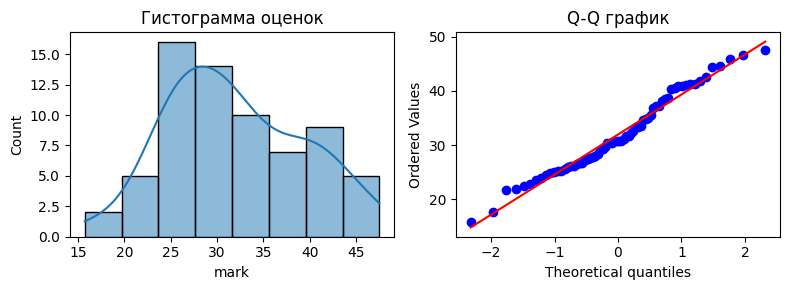

In [16]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.histplot(df['mark'], kde=True)
plt.title("Гистограмма оценок")

plt.subplot(1, 2, 2)
stats.probplot(df['mark'], dist="norm", plot=plt)
plt.title("Q-Q график")

plt.tight_layout()
plt.show()

In [17]:
old_design_mean = 30 # средняя оценка прошлого дизайна

Так как считаем, что распределение нормальное, то можем воспользоваться t-тестом для одной выборки:

In [18]:
t_stat, p_value = stats.ttest_1samp(df['mark'], popmean=old_design_mean)
p_value_one_sided = p_value / 2 if t_stat > 0 else 1
print(f"t-тест: t = {t_stat:.3f}, p-value = {p_value_one_sided:.3f}")

t-тест: t = 2.198, p-value = 0.016


Так как p-value меньше, чем 0.05, то считаем, что улучшение нового дизайна статистически значимо.

## 2. Анализ влияния возраста на оценку

Для того, чтобы выяснить, влияет ли возраст на новую оценку, можно провести ANOVA (дисперсионный анализ), чтобы выяснить, различаются ли оценки между разными возрастными группами:

In [19]:
df['age_group'] = df['age_group'].astype('category')
anova_results = stats.f_oneway(*[df['mark'][df['age_group'] == group] for group in df['age_group'].unique()])
print(f"ANOVA: F-статистика = {anova_results.statistic:.3f}, p-value = {anova_results.pvalue:.6f}")

ANOVA: F-статистика = 6.993, p-value = 0.000031


Получили p-value меньше 0.05, следовательно, возраст оказывает значительное влияние на оценку дизайна.

## 3. Рекомендации для отдела маркетинга
1. Новый дизайн посадочной страницы значительно улучшен по сравнению со старым, поэтому его стоит использовать.
2. Однако, существует существенная разница в восприятии дизайна среди разных возрастных групп. Рекомендуется провести дополнительное исследование, чтобы понять, каким образом можно улучшить дизайн для возрастных групп с более низкими оценками. ​